# Load DataSet and Library import 

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hardivalangar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hardivalangar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv("sentimentdataset.csv")  # Load the dataset
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


# DATA PREPROCESSING

In [3]:
stop_words = set(stopwords.words('english')) 

def preprocess_text(Text):
    # Tokenize the text
    tokens = word_tokenize(Text)
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

data['Text'] = data['Text'].apply(preprocess_text)

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=1)

In [5]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [7]:
# Evaluate the model
y_pred = rf.predict(X_test_vec)
accuracy = rf.score(X_train_vec, y_train)*100
print("Accuracy:", accuracy)

Accuracy: 99.65811965811966


In [8]:
# Train a classifier (Linear SVM)
classifier = LinearSVC(random_state = 1)
classifier.fit(X_train_vec, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=1)

In [9]:
# Evaluate the model
y_pred = classifier.predict(X_test_vec)
accuracy = classifier.score(X_train_vec, y_train)*100
print("Accuracy:", accuracy)

Accuracy: 99.48717948717949


# Confusion Matrices

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test_vec)
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(51.0, 0.5, 'Actual')

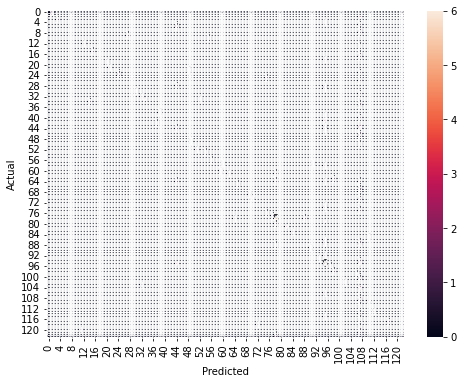

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Example of predicting sentiment of a new sentence

In [28]:
new_sentence = "my health is very critical"
new_sentence_vec = vectorizer.transform([new_sentence])
predicted_sentiment = rf.predict(new_sentence_vec)
print("Predicted sentiment:", predicted_sentiment[0])

Predicted sentiment:  Sadness      


# Data visulisation 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data.shape

(732, 15)

In [31]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying beautiful day park !,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic terrible morning .,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,finished amazing workout ! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited upcoming weekend getaway !,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying new recipe dinner tonight .,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [32]:
data.duplicated().any()

False

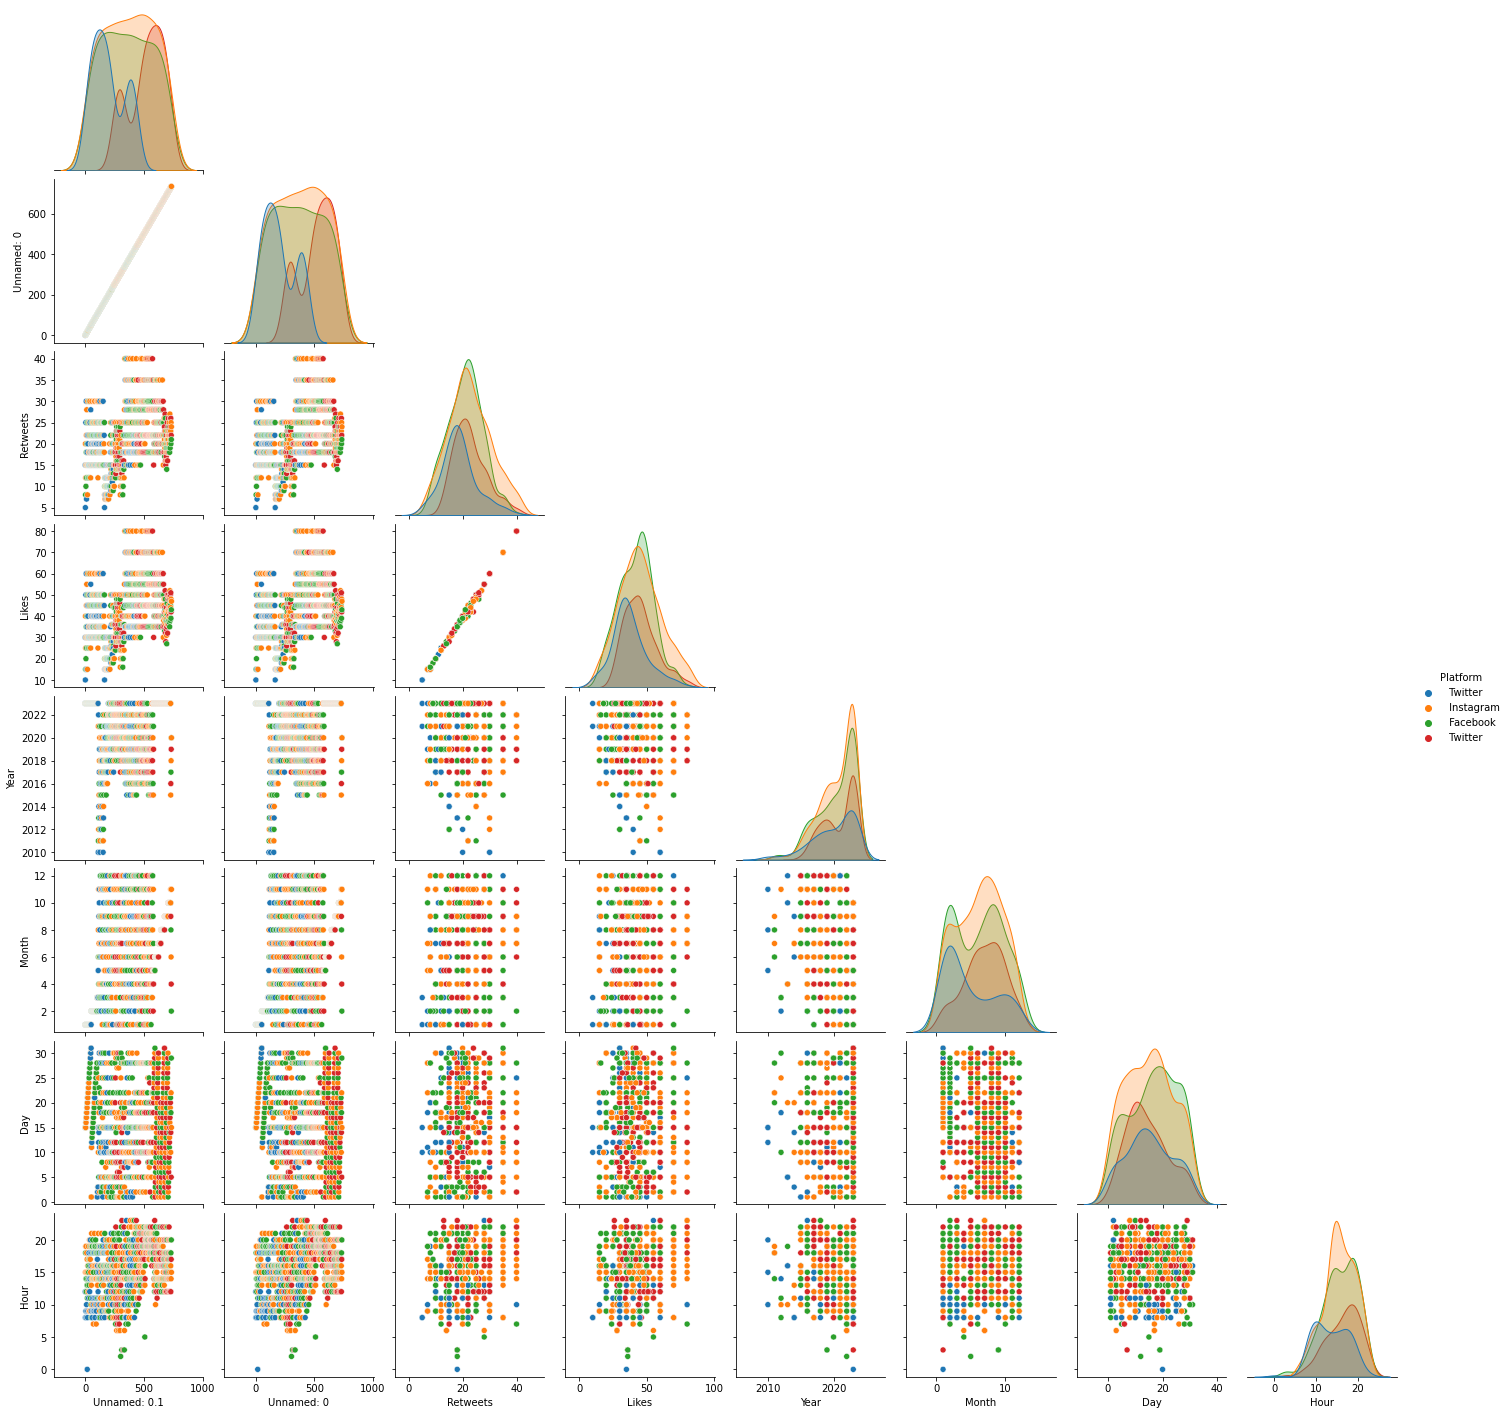

In [33]:
sns.pairplot(data, hue = 'Platform', corner=True)

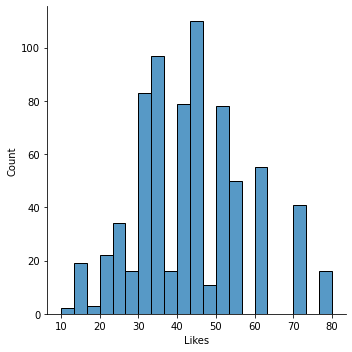

In [34]:
sns.displot(data.Likes)


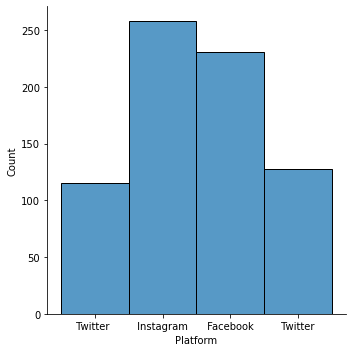

In [35]:
sns.displot(data.Platform, fill=True)

Text(0.5, 1.0, 'likes_of_platform')

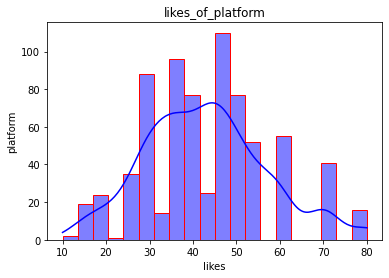

In [36]:
sns.histplot(data['Likes'],bins=20,color='Blue',edgecolor='Red',kde=True)
plt.xlabel("likes")
plt.ylabel("platform")
plt.title("likes_of_platform")

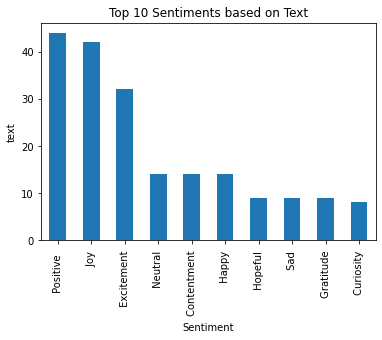

In [37]:
data['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('text')
plt.show()

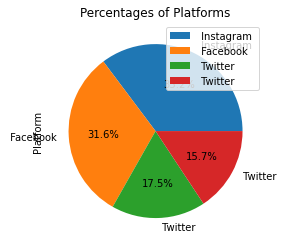

In [38]:
data['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

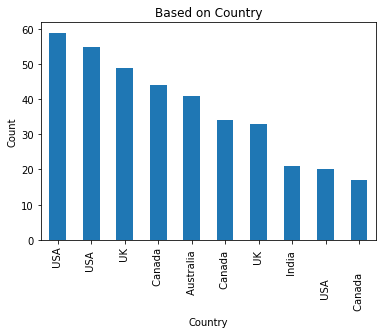

In [39]:
data['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Based on Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()